In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

def visualize(df1, df2):
    # Remove the ".pdf" extension from filenames in both dataframes
    df1['filename'] = df1['filename'].str.replace('.pdf', '', regex=False)
    df2['filename'] = df2['filename'].str.replace('.pdf', '', regex=False)

    # Merge on filename to compare actual and predicted labels
    comparison = df1.merge(df2, on="filename")
    
    # Map labels to binary values: YES -> 1, NO -> 0
    y_true = comparison["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = comparison["predicted_label"].map({"YES": 1, "NO": 0})

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)


    # Visualize the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap='Blues')
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")

    # Set tick marks and labels (assuming binary classification: NO=0, YES=1)
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(["NO", "YES"])
    ax.set_yticklabels(["NO", "YES"])

    # Annotate the confusion matrix with counts
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    fig.colorbar(im, ax=ax)
    plt.show()


In [27]:
truth_path= r"../Final/csv_data/new_test_actual.csv"
truth = pd.read_csv(truth_path)

In [29]:
# # 20
# pred_path_40 = r"../Final/result/test_predictions_ann.csv" 
# pred_40 = pd.read_csv(pred_path_40)
# visualize(truth, pred_40)

Accuracy: 0.75
Precision: 0.67
Recall: 0.33
F1 Score: 0.44


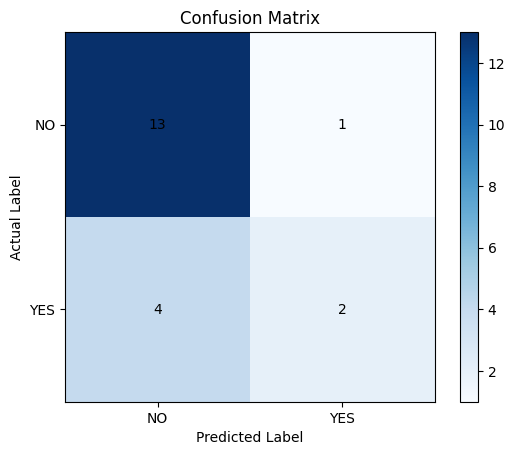

In [47]:
# 40
pred_path_40 = r"../Final/result/waste_40/test_predictions_20_2_half.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

Accuracy: 0.70
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\gavin\.conda\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


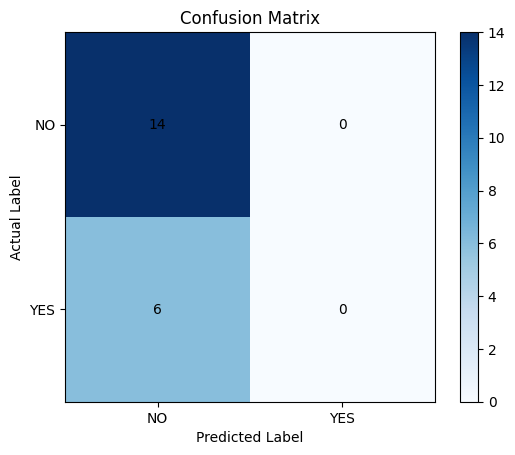

In [22]:
# 40
pred_path_40 = r"../Final/result/test_predictions_20_1.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

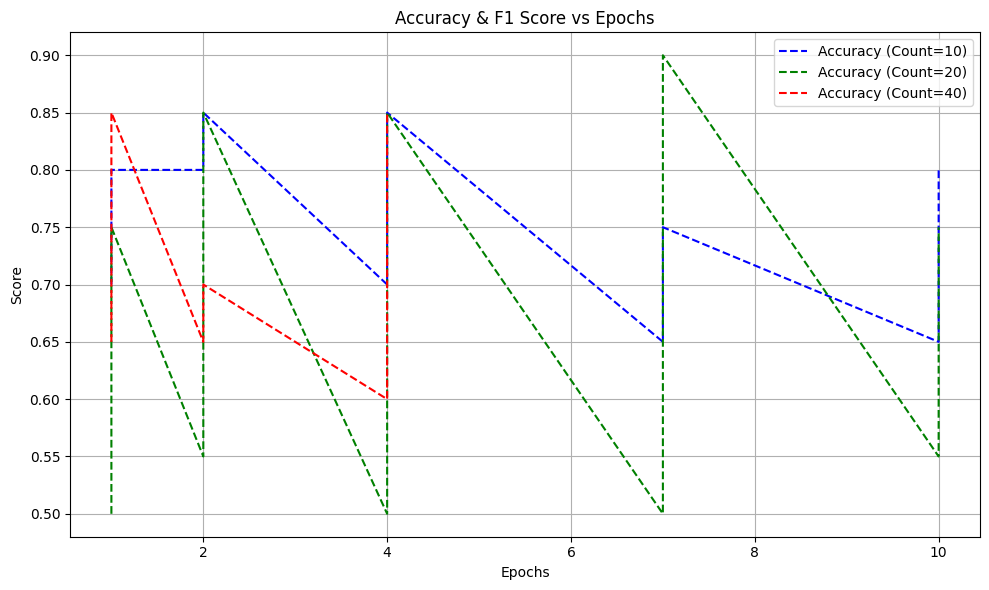

In [3]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result/waste_40"

# Store scores by count and epoch
metrics_by_count = {}

# Go through each result file
for file in os.listdir(result_folder):
    if not file.endswith(".csv"):
        continue
    
    # Extract count and epoch from file name: test_predictions_<count>_<epoch>.csv
    parts = file.replace(".csv", "").split("_")
    count = int(parts[2])
    epoch = int(parts[3])
    
    pred_df = pd.read_csv(os.path.join(result_folder, file))
    pred_df['filename'] = pred_df['filename'].str.replace('.pdf', '', regex=False)

    # Merge with ground truth
    merged = truth_df.merge(pred_df, on="filename", how="inner")

    y_true = merged["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = merged["predicted_label"].map({"YES": 1, "NO": 0})

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Store metrics
    if count not in metrics_by_count:
        metrics_by_count[count] = {"epochs": [], "accuracy": [], "f1": []}
    
    metrics_by_count[count]["epochs"].append(epoch)
    metrics_by_count[count]["accuracy"].append(acc)
    metrics_by_count[count]["f1"].append(f1)

# === Plot ===
plt.figure(figsize=(10, 6))
colors = {10: 'blue', 20: 'green', 40: 'red'}

for count, metrics in sorted(metrics_by_count.items()):
    # Sort by epoch
    sorted_data = sorted(zip(metrics["epochs"], metrics["accuracy"], metrics["f1"]))
    epochs, accs, f1s = zip(*sorted_data)

    # Plot accuracy
    plt.plot(epochs, accs, label=f"Accuracy (Count={count})", linestyle='--', color=colors[count])

    # Plot F1 (thicker)
    # plt.plot(epochs, f1s, label=f"F1 Score (Count={count})", linewidth=2.5, color=colors[count])

plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Accuracy & F1 Score vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


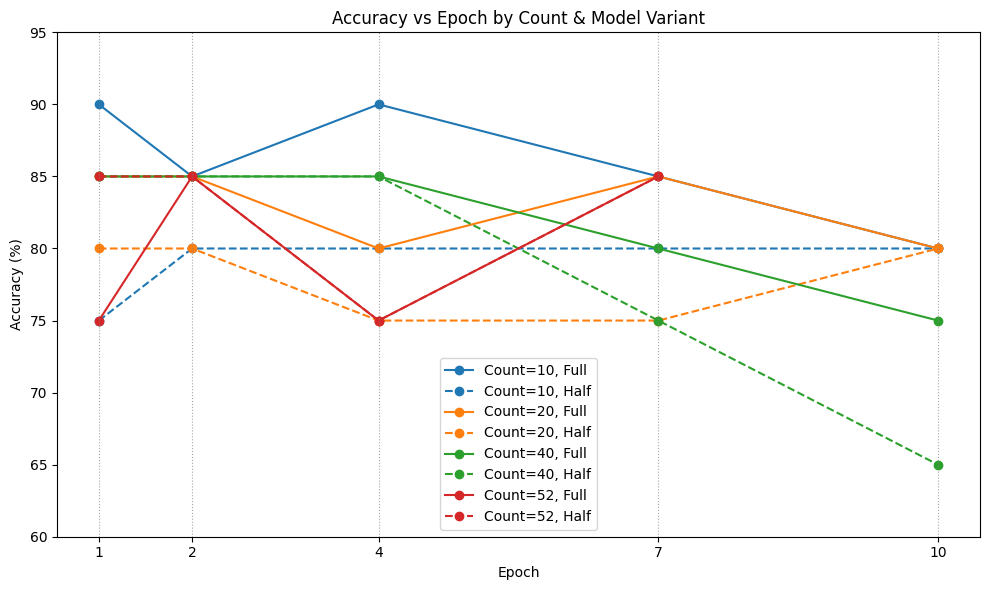

In [ ]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result/waste_52"

# === Collect metrics ===
metrics = {}  # (count, variant) -> {'epochs':[], 'accuracy':[], 'f1':[]}
for fn in os.listdir(result_folder):
    if not fn.endswith(".csv"):
        continue

    _, _, cnt_s, ep_s, variant = fn[:-4].split("_")
    count, epoch = int(cnt_s), int(ep_s)
    variant = variant.lower()  # "full" or "half"

    df = pd.read_csv(os.path.join(result_folder, fn))
    df['filename'] = df['filename'].str.replace('.pdf', '', regex=False)
    merged = truth_df.merge(df, on="filename", how="inner")

    y_true = merged["actual_label"].map({"YES":1, "NO":0})
    y_pred = merged["predicted_label"].map({"YES":1, "NO":0})

    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    if variant == 'half':
        key = (count, variant)
        metrics.setdefault(key, {'epochs':[], 'accuracy':[], 'f1':[]})
        metrics[key]['epochs'].append(epoch)
        metrics[key]['accuracy'].append(acc * 100)  # scale to percent
        metrics[key]['f1'].append(f1 * 100)

# === Plot ===
fig, ax = plt.subplots(figsize=(10,6))

colors     = {10:'C0', 20:'C1', 40:'C2', 52:'C3'}
linestyles = {'full':'-', 'half':'--'}
xticks     = [1, 2, 4, 7, 10]
yticks     = [60,65, 70, 75, 80, 85, 90,95]

# 1) Plot each series
for (count, variant), data in sorted(metrics.items()):
    xs, ys = zip(*sorted(zip(data['epochs'], data['accuracy'])))
    ax.plot(xs, ys,
            color=colors[count],
            linestyle=linestyles[variant],
            marker='o',
            label=f"Count={count}, {variant.capitalize()}")

# 2) Draw vertical lines at the xticks
for x in xticks:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.8, alpha=0.7)

# 3) Now set the ticks and limits
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_ylim(min(yticks), max(yticks))

# 4) Labels, title, legend
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy vs Epoch by Count & Model Variant")
ax.legend(loc='best')

fig.tight_layout()
plt.show()


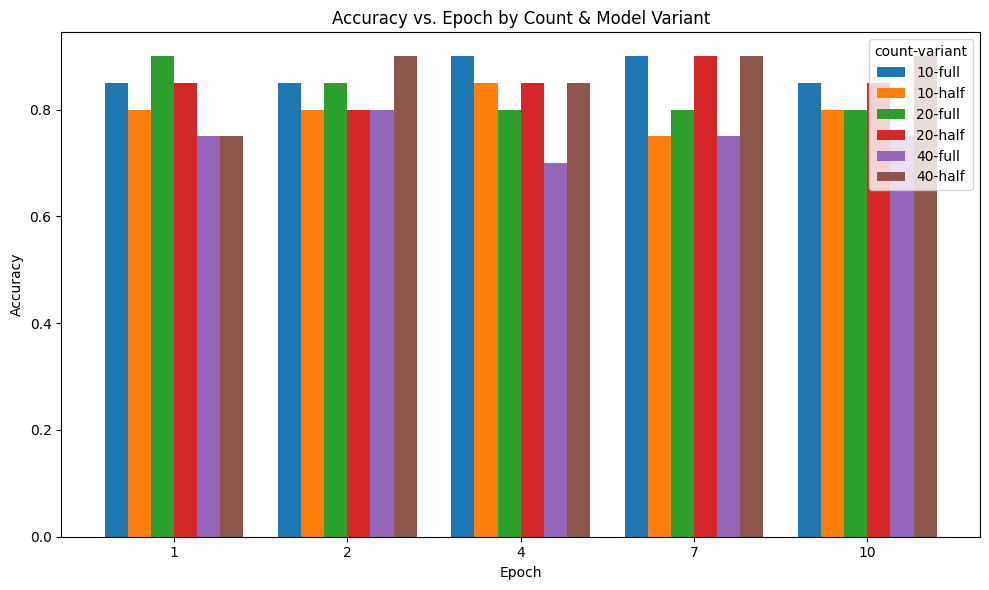

In [20]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result/waste_40"

# === Collect metrics into a flat list of records ===
records = []
for fn in os.listdir(result_folder):
    if not fn.endswith(".csv"):
        continue

    # Filename format: test_predictions_<count>_<epoch>_<variant>.csv
    _, _, cnt_s, ep_s, variant = fn[:-4].split("_")
    count, epoch = int(cnt_s), int(ep_s)
    variant = variant.lower()  # "full" or "half"

    # Load predictions and merge with ground truth
    df = pd.read_csv(os.path.join(result_folder, fn))
    df['filename'] = df['filename'].str.replace('.pdf', '', regex=False)
    merged = truth_df.merge(df, on="filename", how="inner")

    # Compute metrics
    y_true = merged["actual_label"].map({"YES":1, "NO":0})
    y_pred = merged["predicted_label"].map({"YES":1, "NO":0})
    acc  = accuracy_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)

    # Append to records
    records.append({
        "epoch": epoch,
        "count": count,
        "variant": variant,
        "accuracy": acc,
        "f1_score": f1
    })

# === Build DataFrame and pivot for plotting ===
df_metrics = pd.DataFrame(records)

# Pivot so each (count, variant) is its own column
pivot_acc = df_metrics.pivot_table(
    index='epoch',
    columns=['count','variant'],
    values='accuracy'
).sort_index()

# === Plot grouped bar chart ===
ax = pivot_acc.plot(
    kind='bar',
    figsize=(10,6),
    width=0.8
)

# Generate clean legend labels like "10-full", "20-half", etc.
handles, _ = ax.get_legend_handles_labels()
labels = [f"{cnt}-{var}" for cnt, var in pivot_acc.columns]
ax.legend(handles, labels, title="count-variant", loc='best')

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. Epoch by Count & Model Variant")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
